In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# A. 데이터 읽어오기

In [61]:
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path, usecols=range(0,5))
# df = pd.read_csv(csv_path, usecols= ['Date', 'Open', 'High', 'Low', 'Close'])
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [64]:
df.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

# B. 21년 이후의 종가 데이터 출력하기

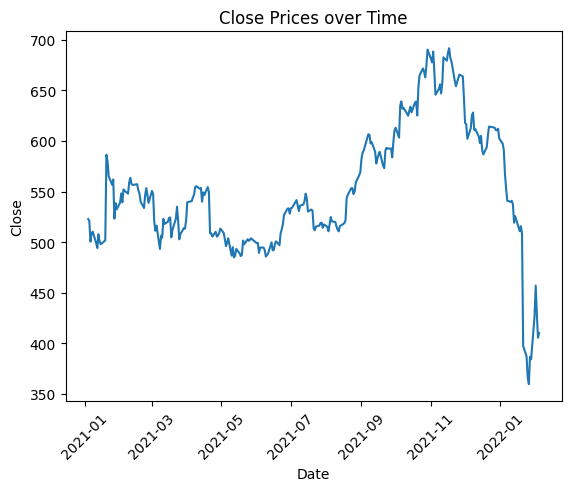

In [63]:
df['Date'] = pd.to_datetime(df['Date'])
df_after_21 = df[df['Date'] >= "2021-01-01"]
#x축, y축
plt.plot(df_after_21['Date'], df_after_21['Close'])
plt.title('Close Prices over Time')
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()


# C. 21년도 이후 최고, 최저 종가 출력하기

In [ ]:
plt.plot(df_after_21['Date'], df_after_21['Low'], label = 'Low')
plt.plot(df_after_21['Date'], df_after_21['High'], label = 'High')

plt.title('High, Low Prices After 2021')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45)

plt.legend()
plt.show()

In [ ]:
df_after_21

In [ ]:
plt.plot(df_after_21['Date'], df_after_21['Close'])


plt.title('Close Prices After 2021')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation = 45)

plt.legend()
plt.show()

In [69]:
# max_price = max(df_after_21['Close'])
# min_price = min(df_after_21['Close'])
max_price = df_after_21['Close'].max()
min_price = df_after_21['Close'].min()

print(f'최고종가 : {max_price}')
print(f'최저종가 : {min_price}')

최고종가 : 691.690002
최저종가 : 359.700012


# D. 21년도 이후 월 별 평균 종가 출력하기

In [ ]:
df_month = df_after_21.groupby(pd.Grouper(key="Date",  freq = "ME")).mean()
df_month


,Open,High,Low,Close
Date,,,,
2021-01-31,530.531051,537.838944,519.854214,526.816845
2021-02-28,547.777366,555.494205,540.621576,548.959999
2021-03-31,519.429134,527.057390,511.326090,518.123482
2021-04-30,532.810952,537.802858,527.041430,533.136662
2021-05-31,496.923996,502.062502,491.996503,496.714497
2021-06-30,503.470914,508.116364,498.675455,503.324091
2021-07-31,528.609045,534.298567,522.618091,528.653330
2021-08-31,529.884541,535.937267,526.222275,532.346817
2021-09-30,589.405233,598.170003,583.384760,590.795239


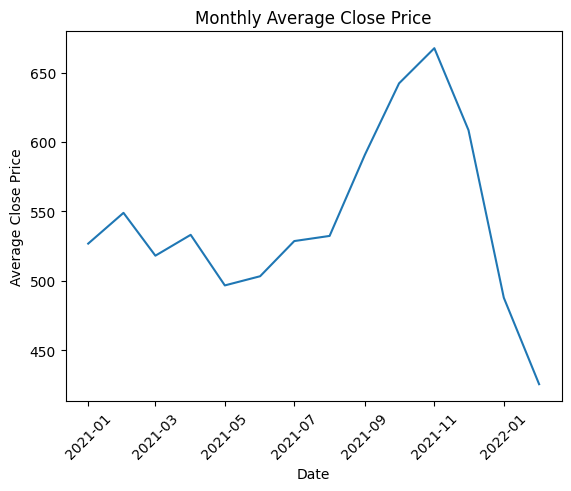

In [79]:
#월별 평균 종가 계산
monthly_avg_close = df_after_21.groupby(df_after_21['Date'].dt.to_period('M')).mean(numeric_only=True)
#행이 변경되었으므로, 다시 변경
monthly_avg_close.reset_index(inplace=True)
# 'Date'를 datetime 형식으로 변환
monthly_avg_close['Date'] = monthly_avg_close['Date'].dt.to_timestamp()
monthly_avg_close
# print(monthly_avg_close.dtypes)
plt.plot(monthly_avg_close['Date'], monthly_avg_close['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation = 45)
plt.show()

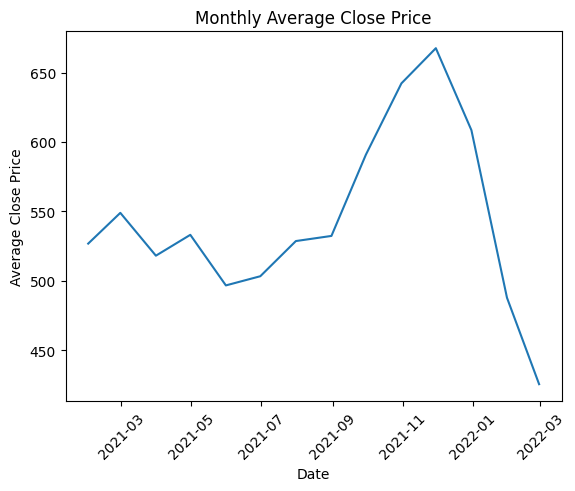

In [55]:
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation = 45)
plt.plot(df_month['Close'])

# E. 22년도 이후 최고, 최저, 종가 시각화하기

In [ ]:
dff = pd.read_csv(csv_path, usecols= ['Date', 'High', 'Low', 'Close'])
dff['Date'] = pd.to_datetime(dff['Date'])
# 2022년 1월 이후의 데이터 필터링
df_after_22 = dff[dff['Date'] >= "2022-01-01"]
df_after_22


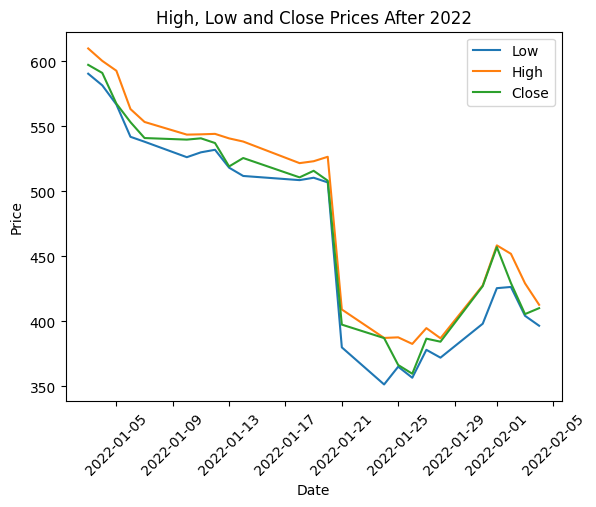

In [71]:
plt.plot(df_after_22['Date'], df_after_22['Low'], label = 'Low')
plt.plot(df_after_22['Date'], df_after_22['High'], label = 'High')
plt.plot(df_after_22['Date'], df_after_22['Close'], label = 'Close')

plt.title('High, Low and Close Prices After 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation = 45)

plt.legend()
plt.show()